#### Loading the Data
First, the necessary libraries are loaded into the notebook. The pandas library and the glob libraries are used to import data from all the 'CVS' in the folder and preview the first five rows of the DataFrame.

In [1]:
#Importing the libraries we will be using for this work.

import pandas as pd
from matplotlib import pyplot as plt
import glob
import seaborn as sns
import numpy as np
from datetime import datetime as dt

%matplotlib inline

In [2]:
#Importing all files into a data set.
files = glob.glob("*videos.csv")

country_videos_list = []
for filename in files:
    data = pd.read_csv(filename,encoding='latin-1')
    country_videos_list.append(data)

video_data = pd.concat(country_videos_list)

In [3]:
#Looking at the first 10 records of this dataset.
video_data.head(5)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


We look at the column names to identify if there is a name we may need to change.In this case all comply with the correct naming convention. We can continue with this names.

In [4]:
#Looking the name of the columns

video_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
video_data.shape

(375942, 16)

Then we search will look for any datatypes that doesn't align with the datatype assign. In this case we will change the datatypes for the following columns:


In [6]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-nu

In [7]:
video_data.describe()

,category_id,views,likes,dislikes,comment_count
count,375942.000000,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05
mean,20.232302,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03
std,7.132413,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02
50%,23.000000,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02
75%,24.000000,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


2) Create a new column to represent the like-dislike ratio (likes divided by dislikes) for the videos in each dataset.

* What is the average like-dislike ratio for all of the videos? (average number of likes per video divided by the average number of dislikes per video).

In [8]:
video_data['like_ratio']=video_data['likes']/ video_data['dislikes']
#Changing the inf values that were created by dividing by zero to Nan values.

video_data.loc[~np.isfinite(video_data['like_ratio']), 'like_ratio'] = np.nan
mean=np.mean(video_data['like_ratio'])
print('The average like-dislike ratio for all of the videos is :',f'{mean:.3}')

The average like-dislike ratio for all of the videos is : 40.1


3) Perform data manipulation to find the average number of likes per video for the US and GB in the year 2018.

In [9]:
#Loading data for the US and GB only.

files2=["USvideos.csv","GBvideos.csv"]
us_gb=[]

for filename in files2:
    data = pd.read_csv(filename)
    us_gb.append(data)

us_gb_data=pd.concat(us_gb)

us_gb_data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [10]:
#Converting into date datatype

us_gb_data['publish_time']=pd.to_datetime(us_gb_data['publish_time'],format='%Y/%m/%d %H:%M:%S.%f')

In [11]:
mean_2018=us_gb_data[us_gb_data['publish_time'].dt.year==2018].likes.mean()

print('The mean of likes  for the US and GB in 2018 is:',f'{mean_2018:.8}')

The mean of likes  for the US and GB in 2018 is: 121144.92


4) Business report: Your client hypothesizes that the most polarizing videos get shared the most. Analyze the data to determine whether your client is correct.

We can see in the following graphs that we have more views with more likes that seems obvious but in the second graph we see that we have more views with less dislikes.


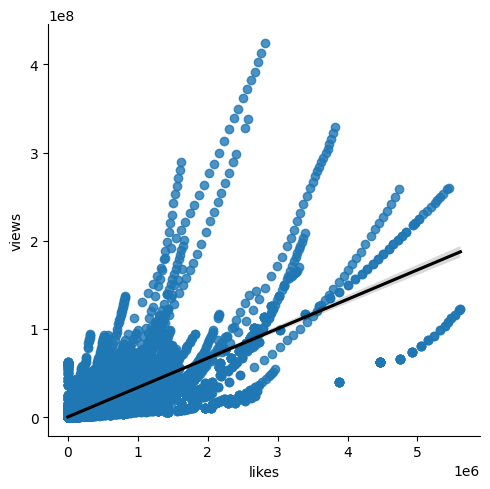

<Figure size 640x480 with 0 Axes>

In [12]:
#Plotting likes and dislikes in the x and y axis and the number of views as hue into the scatter plot to look for a relationship of between this three dimension.

sns.lmplot(x = "likes", y = "views", data = video_data, line_kws={'color': 'black'})
plt.show()
plt.clf()


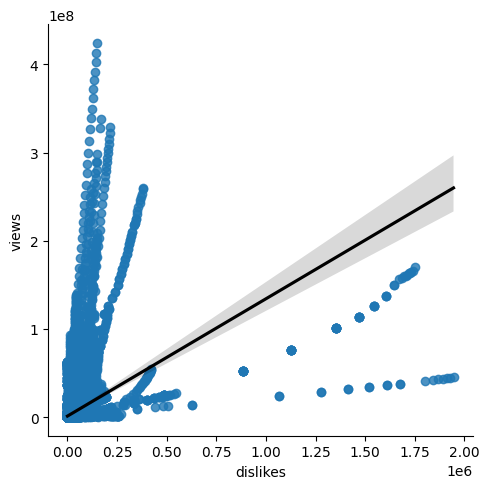

<Figure size 640x480 with 0 Axes>

In [13]:
sns.lmplot(x = "dislikes", y = "views", data = video_data, line_kws={'color': 'black'})
plt.show()
plt.clf()